In [1]:
pip install pmdarima

  Using cached https://files.pythonhosted.org/packages/d3/b8/0295767de22ac446faa0fa596e06112eedb498f897682dd338fb4bf035c2/pmdarima-1.8.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [5]:
daily_acc = pd.read_csv('arp_DailyAccidents_sixCities.csv', index_col=[0],parse_dates=[0])

In [6]:
daily_acc.head()

,Accidents
Date,
2016-04-02,2
2016-05-04,1
2016-06-14,5
2016-06-17,4
2016-06-21,209


In [8]:
daily_acc.shape

(1472, 1)

In [9]:
daily_acc.describe()

,Accidents
count,1472.000000
mean,237.769701
std,123.526075
min,1.000000
25%,99.750000
50%,272.000000
75%,334.000000
max,509.000000


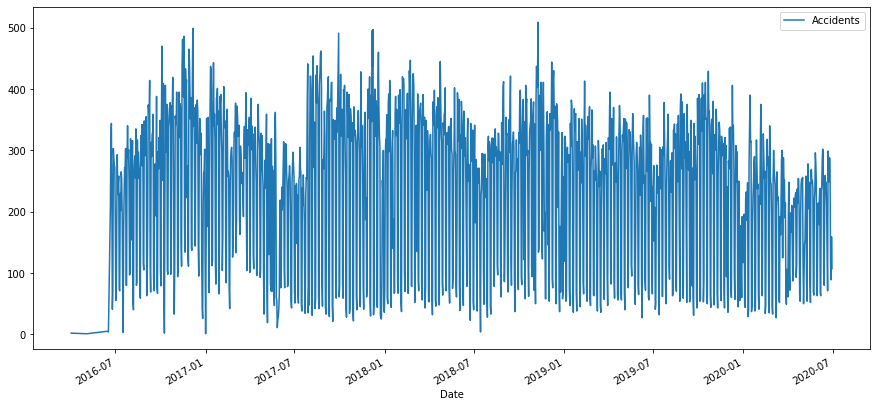

In [10]:
daily_acc.plot(figsize=(15,7))
plt.show()

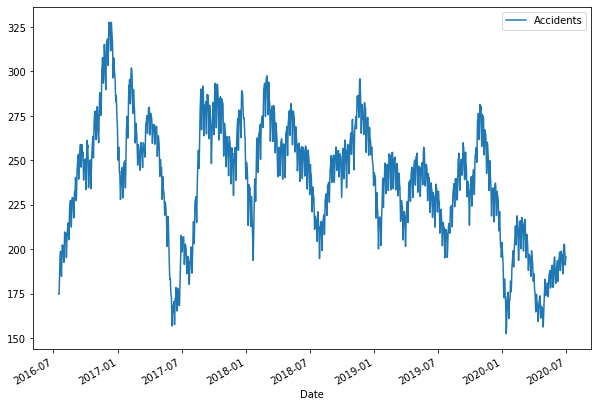

In [11]:
daily_acc_mean = daily_acc.rolling(window = 30).mean()
daily_acc_mean.plot(figsize=(10,7))
plt.show()

### 1. Baseline Model

In [12]:
daily_acc_series= daily_acc.values

In [13]:
value =pd.DataFrame(daily_acc_series)

In [14]:
d_accDF = pd.concat([value,value.shift(1)],axis=1)

In [15]:
d_accDF.head(3)

,0,0
0,2,NaN
1,1,2.0
2,5,1.0


In [16]:
d_accDF.columns = ('Actual_Accidents','Forecast_Accident')

In [17]:
d_accDF.head()

,Actual_Accidents,Forecast_Accident
0,2,NaN
1,1,2.0
2,5,1.0
3,4,5.0
4,209,4.0


In [18]:
d_accDF.dropna(inplace=True)

In [19]:
acc_err = mean_squared_error(d_accDF.Actual_Accidents,d_accDF.Forecast_Accident)
acc_err

19149.485384092455

In [20]:
print('RMSE: ', np.sqrt(acc_err))

RMSE:  138.38166563563416


In [21]:
print('R-Squared score: ', r2_score(d_accDF.Actual_Accidents,d_accDF.Forecast_Accident))

R-Squared score:  -0.25810658760330774


### 2. ARIMA Model

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

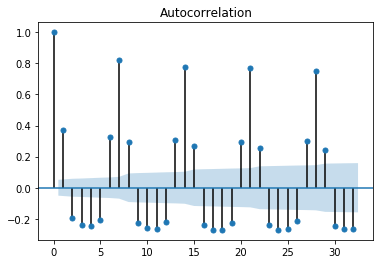

In [24]:
#plot_acf is to determine Q

plot_acf(daily_acc)
plt.show()

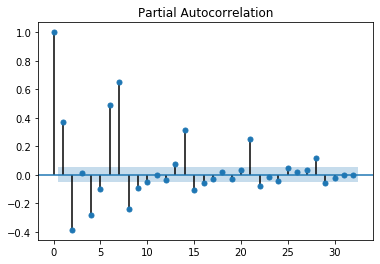

In [25]:
#determine the value of P

plot_pacf(daily_acc)
plt.show()

In [26]:

size = int(len(daily_acc) * 0.80)
train = daily_acc[0:size] 
test = daily_acc[size:len(daily_acc)]

#print(train.size,test.size)

In [29]:
test.size

295

In [27]:
#9,1,5 rmse=89. r2 =32 --9,2,6 rmse=88 r2 =34
from statsmodels.tsa.arima_model import ARIMA
acc_model = ARIMA(train,order=(9,2,6))

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency

In [28]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

acc_model_fit = acc_model.fit()

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATI

In [30]:
acc_forecast = acc_model_fit.forecast(steps=295)[0]

In [31]:
print('RMSE: ',np.sqrt(mean_squared_error(test,acc_forecast)))

RMSE:  87.63525522835975


In [32]:
acc_forecast_df = pd.DataFrame(acc_forecast, index=test.index)

In [33]:
acc_forecast_df.rename(columns={0:'Predictions'},inplace=True)

In [34]:
prediction_df= acc_forecast_df
test_df= test

test_prediction= test_df.join(prediction_df, on='Date')
test_prediction.head(10)

,Accidents,Predictions
Date,,
2019-09-09,375,170.482360
2019-09-10,270,337.525686
2019-09-11,327,280.248144
2019-09-12,268,295.632674
2019-09-13,298,280.930010
2019-09-14,53,159.682774
2019-09-15,69,56.696975
2019-09-16,343,182.391694
2019-09-17,349,321.197696


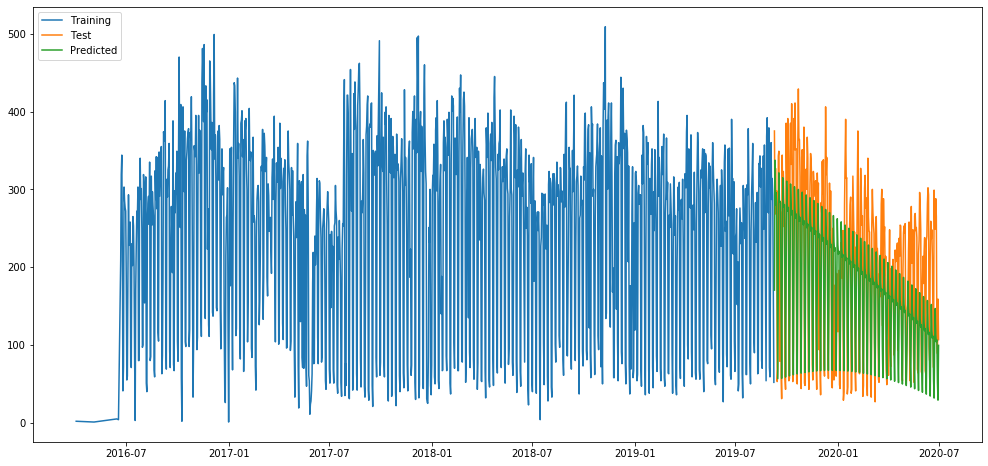

In [35]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(acc_forecast_df,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [36]:
print('R-Squared score: ',r2_score(test,acc_forecast))

R-Squared score:  0.3420574900884744


In [35]:
#f1_score(test, acc_forecast)

In [36]:
#from sklearn.metrics import f1_score

In [37]:
from pmdarima.arima import auto_arima

In [38]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [45]:
arima_m = auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3,
                     start_P=0, D=1, start_Q=0, max_P=5, max_D=3, max_Q=5, m=12,
                     seasonal=True, stepwise=True, suppress_warnings=True,error_action='warn',
                     trace=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=16033.082, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=15456.997, Time=0.64 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=16033.663, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=15201.130, Time=2.61 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=14868.221, Time=4.90 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=14765.417, Time=9.77 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=inf, Time=24.19 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=14612.671, Time=44.47 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=12.97 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=14448.840, Time=67.99 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=inf, Time=140.64 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=14417.429, Time=59.31 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=39.38 sec
 ARIMA(1,1,0)(4,1,3)[12]   

MemoryError: Unable to allocate 36.8 MiB for an array with shape (64, 64, 1178) and data type float64

In [46]:
arima_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1177
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -7429.110
Date:                            Tue, 19 Jan 2021   AIC                          14868.221
Time:                                    01:28:33   BIC                          14893.519
Sample:                                         0   HQIC                         14877.765
                                           - 1177                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3929      0.035    -11.094      0.000      -0.462      -0.324
ar.S.L12      -1.2037      0.026    -47.018      0.000      -1.254      -1.153
ar.S.L24      -1.0546      0.035    -29.745      0.000      -1.124      -0.985
ar.S.L36      -0.5606      0.025    -22.309      0.000      -0.610      -0.511
sigma2      2.002e+04    973.278     20.570      0.000    1.81e+04    2.19e+04
===================================================================================
Ljung-Box (L1) (Q):                  26.89   Jarque-Bera (JB):                37.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.43
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
predictn = pd.DataFrame(arima_m.predict(n_periods = 295), index=test.index)
predictn.columns =['predictionx']
predictn

,predictionx
Date,
2019-09-09,149.061882
2019-09-10,130.469853
2019-09-11,200.829270
2019-09-12,244.576566
2019-09-13,209.201634
...,...
2020-06-26,-226.063256
2020-06-27,-307.956816
2020-06-28,-281.033937


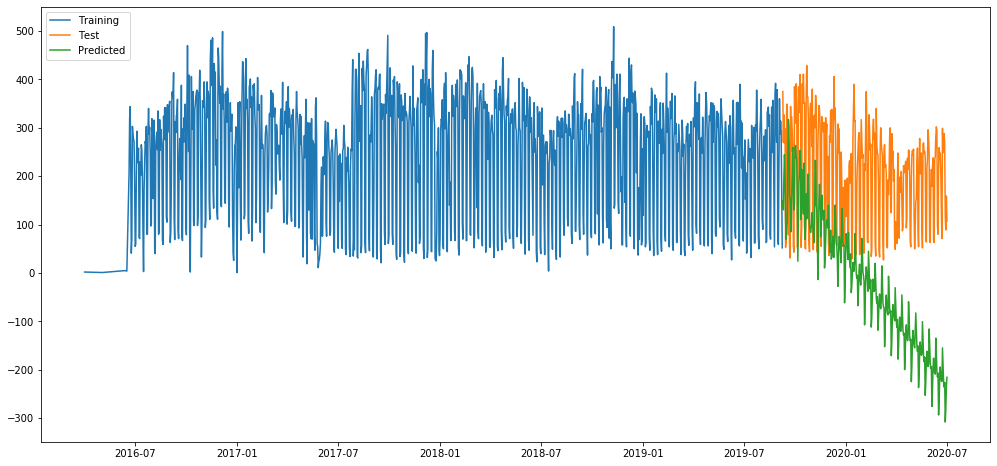

In [43]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(predictn,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [44]:
print('R-Squared score: ',r2_score(test,predictn))

R-Squared score:  -5.176224814834056
